In [137]:
INVALID_TEXT = "INVALID-DATA"
DATA_NOT_PROVIDED = "DATA-NOT-PROVIDED"

VALUES_TO_IGNORE = [INVALID_TEXT,DATA_NOT_PROVIDED]

In [ ]:
import pandas as pd
prices = pd.read_csv("prices_full.csv").drop(columns=['Unnamed: 0'])
prices.head()

In [107]:
columns_to_process = list(prices.columns)
columns_to_process

['file_id',
 'chainid',
 'subchainid',
 'storeid',
 'bikoretno',
 'priceupdatedate',
 'itemcode',
 'itemname',
 'manufacturername',
 'manufacturecountry',
 'manufactureritemdescription',
 'unitqty',
 'quantity',
 'unitofmeasure',
 'bisweighted',
 'qtyinpackage',
 'itemprice',
 'unitofmeasureprice',
 'allowdiscount',
 'itemstatus',
 'itemid',
 'itemtype',
 'lastupdatedate',
 'lastupdatetime']

# Date columns

In [108]:
date_columns = ['priceupdatedate', "lastupdatedate", "lastupdatetime"]

In [109]:
prices['dt_priceupdatedate'] = pd.to_datetime(prices['priceupdatedate'],errors='coerce')
prices['dt_priceupdatedate'].isna().sum() # :) 
# great there is no pharsing failure.

0

In [5]:
assert prices[~prices['lastupdatedate'].isin(['unknown',"NO-CONTENT"])].empty, "'lastupdatedate' column is in use"
assert prices[~prices['lastupdatetime'].isin(['unknown',"NO-CONTENT"])].empty "'lastupdatedate' column is in use"

In [110]:
prices = prices.drop(columns=['lastupdatedate','lastupdatetime','priceupdatedate']).rename(columns={'dt_priceupdatedate':"priceupdatedate"})

In [111]:
columns_to_process = list(set(columns_to_process) - set(date_columns))
columns_to_process

['itemcode',
 'unitofmeasure',
 'manufacturername',
 'file_id',
 'bisweighted',
 'manufacturecountry',
 'qtyinpackage',
 'itemid',
 'bikoretno',
 'itemname',
 'itemstatus',
 'itemprice',
 'itemtype',
 'quantity',
 'allowdiscount',
 'manufactureritemdescription',
 'unitofmeasureprice',
 'subchainid',
 'unitqty',
 'storeid',
 'chainid']

# Store id Columns

In [112]:
store_columns = ['file_id',
                 'chainid',
                 'subchainid',
                 'storeid']

In [113]:
assert ~prices[store_columns].isna().any().any(), "one of the columns are NaN"

In [114]:
from kniot_parser.utils import get_scraper_name_from_id,get_all_scrapers_names

unique_chain_ids = prices['chainid'].unique()
all_chains_found = list(map(get_scraper_name_from_id,unique_chain_ids))

assert len(all_chains_found) == len(unique_chain_ids), "all chains should be listed"

mylogger     2022-12-03 08:40:55,188 INFO     logger.py:info Storage path: dumps/bareket
mylogger     2022-12-03 08:40:55,191 INFO     logger.py:info Storage path: dumps/ybitan
mylogger     2022-12-03 08:40:55,192 INFO     logger.py:info Storage path: dumps/cofix
mylogger     2022-12-03 08:40:55,193 INFO     logger.py:info Storage path: dumps/Dor Alon
mylogger     2022-12-03 08:40:55,195 INFO     logger.py:info Storage path: dumps/GoodPharm
mylogger     2022-12-03 08:40:55,195 INFO     logger.py:info Storage path: dumps/Hazi Hinam
mylogger     2022-12-03 08:40:55,197 INFO     logger.py:info Storage path: dumps/Keshet Taamim
mylogger     2022-12-03 08:40:55,198 INFO     logger.py:info Storage path: dumps/King Store
mylogger     2022-12-03 08:40:55,198 INFO     logger.py:info Storage path: dumps/Maayan2000
mylogger     2022-12-03 08:40:55,199 INFO     logger.py:info Storage path: dumps/mahsani a shuk
mylogger     2022-12-03 08:40:55,201 INFO     logger.py:info Storage path: dumps/mega-ma

mylogger     2022-12-03 08:40:55,260 INFO     logger.py:info Storage path: dumps/Super-Pharm
mylogger     2022-12-03 08:40:55,261 INFO     logger.py:info Storage path: dumps/SuperYuda
mylogger     2022-12-03 08:40:55,261 INFO     logger.py:info Storage path: dumps/Super Dosh
mylogger     2022-12-03 08:40:55,262 INFO     logger.py:info Storage path: dumps/Tiv Taam
mylogger     2022-12-03 08:40:55,263 INFO     logger.py:info Storage path: dumps/bareket
mylogger     2022-12-03 08:40:55,263 INFO     logger.py:info Storage path: dumps/ybitan
mylogger     2022-12-03 08:40:55,264 INFO     logger.py:info Storage path: dumps/cofix
mylogger     2022-12-03 08:40:55,265 INFO     logger.py:info Storage path: dumps/Dor Alon
mylogger     2022-12-03 08:40:55,265 INFO     logger.py:info Storage path: dumps/GoodPharm
mylogger     2022-12-03 08:40:55,266 INFO     logger.py:info Storage path: dumps/Hazi Hinam
mylogger     2022-12-03 08:40:55,267 INFO     logger.py:info Storage path: dumps/Keshet Taamim
my

mylogger     2022-12-03 08:40:55,326 INFO     logger.py:info Storage path: dumps/bareket
mylogger     2022-12-03 08:40:55,326 INFO     logger.py:info Storage path: dumps/ybitan
mylogger     2022-12-03 08:40:55,327 INFO     logger.py:info Storage path: dumps/cofix
mylogger     2022-12-03 08:40:55,328 INFO     logger.py:info Storage path: dumps/Dor Alon
mylogger     2022-12-03 08:40:55,328 INFO     logger.py:info Storage path: dumps/GoodPharm
mylogger     2022-12-03 08:40:55,329 INFO     logger.py:info Storage path: dumps/bareket
mylogger     2022-12-03 08:40:55,330 INFO     logger.py:info Storage path: dumps/ybitan
mylogger     2022-12-03 08:40:55,330 INFO     logger.py:info Storage path: dumps/cofix
mylogger     2022-12-03 08:40:55,331 INFO     logger.py:info Storage path: dumps/Dor Alon
mylogger     2022-12-03 08:40:55,332 INFO     logger.py:info Storage path: dumps/GoodPharm
mylogger     2022-12-03 08:40:55,333 INFO     logger.py:info Storage path: dumps/Hazi Hinam
mylogger     2022-

mylogger     2022-12-03 08:40:55,395 INFO     logger.py:info Storage path: dumps/mega-market
mylogger     2022-12-03 08:40:55,395 INFO     logger.py:info Storage path: dumps/mega
mylogger     2022-12-03 08:40:55,396 INFO     logger.py:info Storage path: dumps/Netiv Hasef
mylogger     2022-12-03 08:40:55,397 INFO     logger.py:info Storage path: dumps/Osher Ad
mylogger     2022-12-03 08:40:55,398 INFO     logger.py:info Storage path: dumps/Polizer
mylogger     2022-12-03 08:40:55,399 INFO     logger.py:info Storage path: dumps/Rami Levy
mylogger     2022-12-03 08:40:55,400 INFO     logger.py:info Storage path: dumps/salachdabach
mylogger     2022-12-03 08:40:55,400 INFO     logger.py:info Storage path: dumps/ShefaBarcartAshem
mylogger     2022-12-03 08:40:55,401 INFO     logger.py:info Storage path: dumps/Shufersal
mylogger     2022-12-03 08:40:55,402 INFO     logger.py:info Storage path: dumps/Stop Market
mylogger     2022-12-03 08:40:55,403 INFO     logger.py:info Storage path: dumps/

mylogger     2022-12-03 08:40:55,528 INFO     logger.py:info Storage path: dumps/Osher Ad
mylogger     2022-12-03 08:40:55,528 INFO     logger.py:info Storage path: dumps/Polizer
mylogger     2022-12-03 08:40:55,529 INFO     logger.py:info Storage path: dumps/Rami Levy
mylogger     2022-12-03 08:40:55,530 INFO     logger.py:info Storage path: dumps/salachdabach
mylogger     2022-12-03 08:40:55,530 INFO     logger.py:info Storage path: dumps/ShefaBarcartAshem
mylogger     2022-12-03 08:40:55,531 INFO     logger.py:info Storage path: dumps/Shufersal
mylogger     2022-12-03 08:40:55,533 INFO     logger.py:info Storage path: dumps/Stop Market
mylogger     2022-12-03 08:40:55,534 INFO     logger.py:info Storage path: dumps/Super-Pharm
mylogger     2022-12-03 08:40:55,534 INFO     logger.py:info Storage path: dumps/SuperYuda
mylogger     2022-12-03 08:40:55,535 INFO     logger.py:info Storage path: dumps/Super Dosh
mylogger     2022-12-03 08:40:55,537 INFO     logger.py:info Storage path: du

In [115]:
prices['subchainid'].unique()
# not sure what are those numbers mean.

array([100,   1,   0,   2,   5])

In [116]:
prices.groupby(['chainid']).subchainid.unique()
# seem like it's not relevent, the only chain we would like to check is '7290027600007'

chainid
7290027600007    [2, 5, 1]
7290055700007          [1]
7290055700014          [1]
7290058108879          [1]
7290058134977          [1]
7290058140886          [1]
7290058159628          [1]
7290058160839          [1]
7290058173198          [1]
7290058197699          [1]
7290058198450          [1]
7290103152017          [1]
7290172900007        [100]
7290492000005          [1]
7290526500006          [1]
7290633800006          [0]
7290639000004          [1]
7290644700005          [0]
7290661400001          [1]
7290696200003          [1]
7290700100008          [1]
7290725900003          [1]
7290785400000          [1]
7290803800003          [1]
7290873255550          [0]
7290875100001          [1]
7290876100000          [1]
7291056200008          [1]
7291059100008          [1]
Name: subchainid, dtype: object

In [117]:
# let's look at the 'stores' files.
stores = pd.read_csv("stores.csv")
stores[stores['chainid'] == 7290027600007][['subchainid','subchainname']].drop_duplicates()
# look like there is use for this subchain id, let's phrse it.

,subchainid,subchainname
1224,7,שופרסל אקספרס
1225,1,שופרסל שלי
1233,50,יש בשכונה
1235,2,שופרסל דיל
1243,5,Be
1247,6,יש חסד
1326,2,שופרסלדיל
1334,18,GOOD MARKET
1367,4,שופרסל דיל אקסטרא
1370,7,שופרסלאקספרס


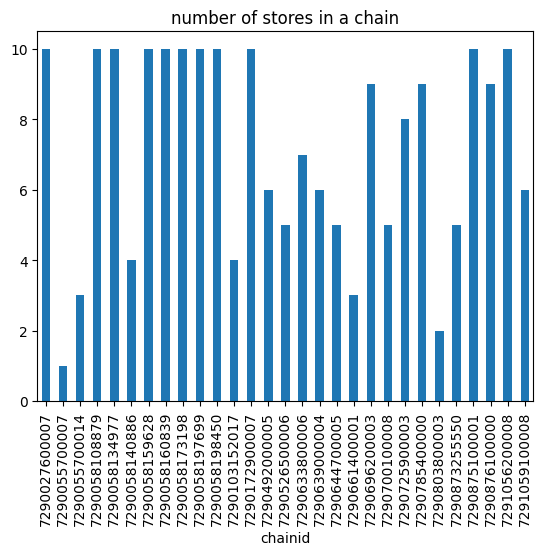

In [120]:
_=prices.groupby(['chainid'])['storeid'].nunique().plot(kind="bar",title="number of stores in a chain")
# heavy use, but seem reletivly small for the number of real stores there is in realife.
# TODO: understand why there is the most 10 store_id for chain?

In [121]:
prices[['chainid','subchainid','storeid']] = prices[['chainid','subchainid','storeid']].astype(int)
# make sure are all integers

In [122]:
columns_to_process = list(set(columns_to_process) - set(store_columns))
columns_to_process

['itemcode',
 'unitofmeasure',
 'manufacturername',
 'bisweighted',
 'manufacturecountry',
 'qtyinpackage',
 'itemid',
 'bikoretno',
 'itemname',
 'itemstatus',
 'itemprice',
 'itemtype',
 'quantity',
 'allowdiscount',
 'manufactureritemdescription',
 'unitofmeasureprice',
 'unitqty']

# Manufacturer columns

In [123]:
manufacturer = ['manufactureritemdescription','manufacturecountry','manufacturername']

In [ ]:
# starting with manufactureritemdescription

In [124]:
import re

def remove_any_not_letter(x):
    result = []
    for word in x.split(" "):
        word = re.sub(r'[^\w\s]', '', word)
        if len(word) > 1:
            result.append(word)
    return " ".join(result)

prices["_manufactureritemdescription"] = prices.manufactureritemdescription.apply(remove_any_not_letter)

In [126]:
invalid_description = prices[prices._manufactureritemdescription.apply(len) == 0]['manufactureritemdescription'].unique()
invalid_description

array(['1 ע צ י ץ', '{}', ', ,       ,0', '..', '?????', '????', '??????',
       'י', '0', 'D'], dtype=object)

In [127]:
# mark all the places where thre is no valid input
prices.loc[prices._manufactureritemdescription.apply(len) == 0,'manufactureritemdescription'] = INVALID_TEXT
prices.drop(columns=['_manufactureritemdescription'],inplace=True)

In [21]:
# since 'manufactureritemdescription' is free text, we can assume that values that means 'no input' will apper much more
manufactureritemdescriptions = prices.groupby('manufactureritemdescription').file_id.count()
manufactureritemdescriptions = manufactureritemdescriptions.sort_values(ascending=False)
manufactureritemdescriptions

manufactureritemdescription
NO-CONTENT               128164
קופון ציפר                 1348
אסם                        1295
עלית                       1094
שטראוס                     1007
                          ...  
קערה במבוק חד-בייבי           1
סנו מוד מבשם אויר             1
סנו מוד מבשם אוי              1
קערה במבוק כח פי ג'יי         1
קרש חיתוך מעץ 10              1
Name: file_id, Length: 232882, dtype: int64

In [128]:
manufactureritemdescription_missing = prices[prices['manufactureritemdescription'] == 'NO-CONTENT']
manufactureritemdescription_missing

,file_id,chainid,subchainid,storeid,bikoretno,itemcode,itemname,manufacturername,manufacturecountry,manufactureritemdescription,...,unitofmeasure,bisweighted,qtyinpackage,itemprice,unitofmeasureprice,allowdiscount,itemstatus,itemid,itemtype,priceupdatedate
7,samples_price_full/Super-Pharm/PriceFull729017...,7290172900007,100,144,100,7290000292557,סנו מט מילוי45לילות,General,NO-CONTENT,NO-CONTENT,...,1.0,0,1.0,14.9,0.42,1,0,not_apply,not_apply,2021-04-22 00:00:00
28,samples_price_full/Super-Pharm/PriceFull729017...,7290172900007,100,144,100,3380810318104,קלרנס סקין ריפר,אלפא,NO-CONTENT,NO-CONTENT,...,0.0,0,1.0,306.8,0.00,1,0,not_apply,not_apply,2020-06-15 00:00:00
97,samples_price_full/Super-Pharm/PriceFull729017...,7290172900007,100,144,100,7290003176106,הממליס משחה 50גר,טעם טבע אלטמן,NO-CONTENT,NO-CONTENT,...,0.0,0,1.0,63.9,0.00,1,0,not_apply,not_apply,2020-09-27 00:00:00
256,samples_price_full/Super-Pharm/PriceFull729017...,7290172900007,100,144,100,46214731552,עוגיות שוקולד ציפס 225 גרם,שסטוביץ,NO-CONTENT,NO-CONTENT,...,100.0,0,1.0,11.0,0.00,1,0,not_apply,not_apply,2022-07-04 00:00:00
411,samples_price_full/Super-Pharm/PriceFull729017...,7290172900007,100,144,100,7290008753371,דוריטוס נאצו 55 גרם,General,NO-CONTENT,NO-CONTENT,...,0.0,0,1.0,2.5,0.00,1,0,not_apply,not_apply,2021-02-03 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286922,samples_price_full/Victory/PriceFull7290696200...,7290696200003,1,3,0,9120025839896,חטיף מילקה מצונן 128 גר`,ג.וילי-פוד אינטרנשיונל **גבינו,NO-CONTENT,NO-CONTENT,...,גרם,0,1,14.9,11.64,1,1,not_apply,1,2022-08-01 15:47:00
1286923,samples_price_full/Victory/PriceFull7290696200...,7290696200003,1,3,0,9120097310583,חטיף שוקו בננה מיניונים מצונן 108 גר`,ג.וילי-פוד אינטרנשיונל **גבינו,NO-CONTENT,NO-CONTENT,...,גרם,0,1,14.9,13.80,1,1,not_apply,1,2022-07-28 09:18:00
1286924,samples_price_full/Victory/PriceFull7290696200...,7290696200003,1,3,0,9310072028750,חטיף שוקולד דאבל קרם טים טם (200 גרם),משה סידס ובנו בעמ,NO-CONTENT,NO-CONTENT,...,גרם,0,1,20.9,10.45,1,1,not_apply,1,2016-03-17 08:41:00
1286925,samples_price_full/Victory/PriceFull7290696200...,7290696200003,1,3,0,9322969000039,פריכיות תירס עם ארבע דגנים מלאים 150 גר`,דנשר (1963) בעמ,NO-CONTENT,NO-CONTENT,...,גרם,0,1,13.9,9.27,1,1,not_apply,1,2018-09-12 08:35:00


In [23]:
# which chains doesn't provide 'manufactureritemdescription', possibly issue with the phrser.
manufactureritemdescription_missing.file_id.apply(lambda x:x.split("/")[1]).value_counts()

mahsani a shuk    44748
Victory           43007
bareket           39775
Super-Pharm         632
cofix                 2
Name: file_id, dtype: int64

In [129]:
# let's check if the entire file was not pharsed on just a few,
# if the just a few, we know that is not the pharser issue, otherwise we will need to check.
missing_by_file = manufactureritemdescription_missing.file_id.value_counts()
entries_by_file = prices[prices.file_id.isin(missing_by_file.index)].file_id.value_counts()
prec_missing = (missing_by_file / entries_by_file).sort_values()
prec_missing

samples_price_full/cofix/PriceFull7291056200008-304-202210200010.xml                 0.000335
samples_price_full/cofix/PriceFull7291056200008-309-202210200010.xml                 0.000704
samples_price_full/Super-Pharm/PriceFull7290172900007-144-202210190353.xml           0.002700
samples_price_full/Super-Pharm/PriceFull7290172900007-148-202210190356.xml           0.003186
samples_price_full/Super-Pharm/PriceFull7290172900007-146-202210190354.xml           0.003548
samples_price_full/Super-Pharm/PriceFull7290172900007-141-202210190351.xml           0.003584
samples_price_full/Super-Pharm/PriceFull7290172900007-149-202210190356.xml           0.003820
samples_price_full/Super-Pharm/PriceFull7290172900007-147-202210190355.xml           0.003860
samples_price_full/Super-Pharm/PriceFull7290172900007-143-202210190352.xml           0.005997
samples_price_full/Super-Pharm/PriceFull7290172900007-150-202210190357.xml           0.006464
samples_price_full/Super-Pharm/PriceFull7290172900007-145-20

In [130]:
# is those 100% missing 'manufactureritemdescription' file are all the files that the chain provided? or possibly, 
# there some file with less the 100% and some without. 


files_with_100_prec_missing = prec_missing[prec_missing == 1.0].index

all_chains_with_missing = prices[prices.file_id.isin(files_with_100_prec_missing)]['chainid'].unique()

files_from_chains_with_missing = prices[prices.chainid.isin(all_chains_with_missing)]['file_id'].unique()

In [27]:
assert len(set(files_from_chains_with_missing) - set(prec_missing[prec_missing  == 1.0].index)) == 0
all_chains_with_missing
# ok, 100% of the files provided by the chains beloe not delivery 'manufactureritemdescription'.
# looking by hand, not data is provided.

array([7290875100001, 7290661400001, 7290633800006, 7290696200003])

In [132]:
prices['manufactureritemdescription'] = prices['manufactureritemdescription'].replace("NO-CONTENT",DATA_NOT_PROVIDED)

In [29]:
# let continue to 'manufacturecountry'

In [30]:
manufacturecountry = prices.groupby("manufacturecountry").file_id.count()
manufacturecountry 

manufacturecountry
,           195
AE           22
AL            5
AM            6
AR          169
           ... 
שווייץ     1375
שוויץ       449
תאילנד     3303
תוניסיה      25
תורכיה     5109
Name: file_id, Length: 219, dtype: int64

In [133]:
# seems we can look manually.
manufacturecountry.index.values

array([',', 'AE', 'AL', 'AM', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR',
       'CA', 'CH', 'CL', 'CN', 'CO', 'CZ', 'Cn', 'DE', 'DK', 'EC', 'EE',
       'EG', 'ES', 'FI', 'FR', 'GB', 'GE', 'GH', 'GR', 'HK', 'HN', 'HR',
       'HU', 'ID', 'IE', 'IL', 'IN', 'IS', 'IT', 'JM', 'JP', 'KE', 'KP',
       'KR', 'LE', 'LK', 'LT', 'LU', 'LV', 'MA', 'MK', 'MX', 'MY', 'NL',
       'NO', 'NO-CONTENT', 'NZ', 'PE', 'PH', 'PK', 'PL', 'PR', 'PT', 'PY',
       'RO', 'RS', 'RU', 'SA', 'SC', 'SE', 'SG', 'SI', 'SK', 'TH', 'TR',
       'TW', 'UA', 'UG', 'US', 'UY', 'VN', 'XX', 'YU', 'ZA', 'אוגנדה',
       'אוזבקיסטן', 'אוסטריה', 'אוסטרליה', 'אוקראינה', 'אורוגואי',
       "אזורביג'אן", 'איחוד אימריות', 'איחוד האמירויות', 'איטליה',
       'אינדונזיה', 'איסלנד', 'אירלנד', 'אלבניה', 'אנגולה', 'אנגליה',
       'אנדונזיה', 'אנדונסיה', 'אסטוניה', 'אקוודור', 'ארגנטינה', 'ארה"ב',
       'ארהב', 'ארמניה', 'ארצות הברית', 'אתיופיה', 'בוטן', 'בולגריה',
       'בוליביה', 'בילרוס', 'בלגיה', 'בלורוס', 'בלרוס', 'ברזיל',
    

In [32]:
# explore
should_be_explained = ['NO-CONTENT',",",'לא ידוע']
missing_manufacturecountry = prices[prices.manufacturecountry.isin(should_be_explained)]
missing_manufacturecountry

,file_id,chainid,subchainid,storeid,bikoretno,itemcode,itemname,manufacturername,manufacturecountry,manufactureritemdescription,...,unitofmeasure,bisweighted,qtyinpackage,itemprice,unitofmeasureprice,allowdiscount,itemstatus,itemid,itemtype,priceupdatedate
0,samples_price_full/Super-Pharm/PriceFull729017...,7290172900007,100,144,100,7290010117970,סבבה בוטנים אמריקאים 50 גרם,General,NO-CONTENT,בוטנים אמריקאים,...,100.0,0,1.0,1.7,0.0000,1,0,not_apply,not_apply,2018-02-28 00:00:00
1,samples_price_full/Super-Pharm/PriceFull729017...,7290172900007,100,144,100,7290000178707,תפוצ`יפס 50גרם,General,NO-CONTENT,צ'יפס בטעם טבעי,...,100.0,0,1.0,3.9,0.0000,1,0,not_apply,not_apply,2021-01-27 00:00:00
2,samples_price_full/Super-Pharm/PriceFull729017...,7290172900007,100,144,100,7290000288413,סנו די רול און 50,General,NO-CONTENT,כדורית רול און,...,100.0,0,1.0,14.9,0.0000,1,0,not_apply,not_apply,2020-04-16 00:00:00
3,samples_price_full/Super-Pharm/PriceFull729017...,7290172900007,100,144,100,7290000288420,סנו די תרסיס,General,NO-CONTENT,תרסיס דוחה יתושים למספר שעות,...,100.0,0,1.0,14.9,0.0000,1,0,not_apply,not_apply,2021-04-22 00:00:00
4,samples_price_full/Super-Pharm/PriceFull729017...,7290172900007,100,144,100,7290000146997,טום וג'רי משחת שיניים בטעם מסטיק 50 מל,General,NO-CONTENT,משחת שיניים בטעם מסטיק,...,100.0,0,1.0,7.9,0.0000,1,0,not_apply,not_apply,2020-06-04 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485006,samples_price_full/Keshet Taamim/PriceFull7290...,7290785400000,1,8,3,4850022432848,דרזה שוקולד עם גל פי,",",לא ידוע,דרזה שוקולד עם גל פירות 150 גר,...,100 גרם,0,20,8.9,5.9333,1,1,184698,1,2022-09-26 12:50:12
1485007,samples_price_full/Keshet Taamim/PriceFull7290...,7290785400000,1,8,3,76808009347,עוגיות ברילה בטעם חמ,",",לא ידוע,עוגיות ברילה בטעם חמאה 180 גר,...,100 גרם,0,1,11.9,6.6111,1,1,184724,1,2022-10-02 20:31:39
1485008,samples_price_full/Keshet Taamim/PriceFull7290...,7290785400000,1,8,3,76808009330,עוגיות ברילה סנדוויץ,",",לא ידוע,עוגיות ברילה סנדוויץ אגוזי לוז 200 גר,...,100 גרם,0,1,11.9,5.9500,1,1,184725,1,2022-10-02 20:31:39
1485009,samples_price_full/Keshet Taamim/PriceFull7290...,7290785400000,1,8,3,76808009354,עוגיות ברילה קקאו 20,",",לא ידוע,עוגיות ברילה קקאו 200 גר,...,100 גרם,0,1,11.9,5.9500,1,1,184726,1,2022-10-02 20:31:39


In [134]:
# which chain contains the what missing value?
missing_manufacturecountry.groupby("chainid")['manufacturecountry'].value_counts()
# it seems there is not pattern.

chainid        manufacturecountry
7290027600007  NO-CONTENT               611
7290055700007  לא ידוע                46010
7290055700014  לא ידוע                15468
7290058108879  לא ידוע                44819
7290058134977  לא ידוע                40162
7290058140886  לא ידוע                62127
7290058159628  לא ידוע                24703
7290058160839  לא ידוע                25817
7290058173198  לא ידוע                28036
7290058197699  לא ידוע                32031
7290058198450  לא ידוע                27586
7290103152017  לא ידוע                 4580
7290172900007  NO-CONTENT             15541
7290492000005  לא ידוע                 6222
7290526500006  לא ידוע                48808
7290633800006  NO-CONTENT             30049
7290639000004  לא ידוע               103109
7290644700005  לא ידוע                39518
7290661400001  NO-CONTENT             14697
7290696200003  NO-CONTENT             43007
7290700100008  לא ידוע                77968
7290725900003  לא ידוע                5413

In [34]:
# we knoe 'לא ידוע','NO-CONTENT' meaning but what about "," ? is there some kind of phrsing issue?
missing_manufacturecountry[missing_manufacturecountry['manufacturecountry'] == ","]['file_id'].unique()
# looking at the file manualy, that isn't pharsing issue.

array(['samples_price_full/cofix/PriceFull7291056200008-299-202210200010.xml'],
      dtype=object)

In [136]:
prices.manufacturecountry = prices.manufacturecountry.replace("NO-CONTENT",DATA_NOT_PROVIDED).replace("לא ידוע",None).replace(",",INVALID_TEXT)

In [141]:
import pycountry
from translate import Translator
from joblib import Memory
memory = Memory("cachedir")

@memory.cache
def country_name(x):
    if x in VALUES_TO_IGNORE or x is None:
        return x
    
    
    match = pycountr
    y.countries.get(alpha_2=x)
    if match:
        # small issue with translator
        if match.name == "Czechia":
            return "צ׳כיה"
        
        # or translate
        translator = Translator(from_lang="english",to_lang="hebrew")
        return translator.translate(match.name)
    
    if len(re.sub(r'[^א-ת]', '', x)) == 0 and x not in VALUES_TO_IGNORE:
        return INVALID_TEXT
    return x


unique_names = prices['manufacturecountry'].drop_duplicates()
country_mapping = unique_names.apply(country_name)
country_mapping = dict(zip(prices['manufacturecountry'].drop_duplicates(),country_mapping))
country_mapping

________________________________________________________________________________
[Memory] Calling __main__--var-folders-3r-ygns0_h16pl1__pln5g3j8t80000gp-T-ipykernel-985991349.country_name...
country_name('DATA-NOT-PROVIDED')
DATA-NOT-PROVIDED
_____________________________________________________country_name - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--var-folders-3r-ygns0_h16pl1__pln5g3j8t80000gp-T-ipykernel-985991349.country_name...
country_name('ארצות הברית')
ארצות הברית
_____________________________________________________country_name - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--var-folders-3r-ygns0_h16pl1__pln5g3j8t80000gp-T-ipykernel-985991349.country_name...
country_name('ישראל')
ישראל
_____________________________________________________country_name - 0.0s, 0.0min
_____________________________________________________________

________________________________________________________________________________
[Memory] Calling __main__--var-folders-3r-ygns0_h16pl1__pln5g3j8t80000gp-T-ipykernel-985991349.country_name...
country_name("אזורביג'אן")
אזורביג'אן
_____________________________________________________country_name - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--var-folders-3r-ygns0_h16pl1__pln5g3j8t80000gp-T-ipykernel-985991349.country_name...
country_name('אוזבקיסטן')
אוזבקיסטן
_____________________________________________________country_name - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--var-folders-3r-ygns0_h16pl1__pln5g3j8t80000gp-T-ipykernel-985991349.country_name...
country_name('בילרוס')
בילרוס
_____________________________________________________country_name - 0.0s, 0.0min
_____________________________________________________________________________

ConnectionError: HTTPConnectionPool(host='api.mymemory.translated.net', port=80): Max retries exceeded with url: /get?q=United+States&langpair=english%7Chebrew (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1b9859850>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

In [37]:
prices.manufacturecountry = prices.manufacturecountry.map(country_mapping)

In [38]:
# manufacturername

In [39]:
prices.groupby('manufacturername').file_id.count().sort_values(ascending=False)

manufacturername
לא ידוע                 792394
,                        53889
Unknown                  39518
General                  13563
סנו                       9314
                         ...  
אנא גידה קוצאלי              1
מנה י.א בעמ                  1
ר.ס חברה ליבוא ויצור         1
מלאזיה מקס                   1
היצרן: ס.פ. פודנצנו          1
Name: file_id, Length: 7697, dtype: int64

In [40]:
prices.manufacturername = prices.manufacturername.replace("לא ידוע","unkownon").replace(",","invalid").replace("Unknown","unkownon").replace("General","כללי")

In [41]:
columns_to_process = list(set(columns_to_process) - set(manufacturer))
columns_to_process

['itemcode',
 'unitofmeasure',
 'bisweighted',
 'qtyinpackage',
 'itemid',
 'bikoretno',
 'itemname',
 'itemstatus',
 'itemprice',
 'itemtype',
 'quantity',
 'allowdiscount',
 'unitofmeasureprice',
 'unitqty']

# itemname

In [42]:
def replcae_star(x):
    match = re.search("\d\*\d",x)
    if match:
        next_string = x[:match.span()[0]+1] + " על " + x[match.span()[1]-1:]
        return replcae_star(next_string)
    return x

replcae_star("אקדח מים 75*71*46 סמ")

'אקדח מים 75 על 71 על 46 סמ'

In [43]:
prices['_clean_itemname'] = prices['itemname'].apply(replcae_star)

In [44]:
#prices[prices['itemname'].str.contains('\+')][['itemname','_clean_itemname']].sample(5)

In [45]:
# look at place we did some work
prices[prices['_clean_itemname'] != prices['itemname']][['itemname','_clean_itemname']].sample(5)

,itemname,_clean_itemname
621619,"שלשיית אלסבון כיף מועשר בשמנים 3*500מ""ל","שלשיית אלסבון כיף מועשר בשמנים 3 על 500מ""ל"
353945,"3ספוגיות קירצוף 9*72 ס""מ","3ספוגיות קירצוף 9 על 72 ס""מ"
1017982,טורבו חטיף דגנים מלאים נוגט 6*28גר,טורבו חטיף דגנים מלאים נוגט 6 על 28גר
881186,מארז ציטוס כאפה 20*1,מארז ציטוס כאפה 20 על 1
241681,ש.שועל עם אפרסק 5*40גר,ש.שועל עם אפרסק 5 על 40גר


In [46]:
# look at place we didn't do some work
prices[prices['_clean_itemname'] == prices['itemname']][['itemname','_clean_itemname']].sample(5)

,itemname,_clean_itemname
24717,ניוואה Q10 אקסטרה נורישינג קרם לילה מזין,ניוואה Q10 אקסטרה נורישינג קרם לילה מזין
631905,רב מגבת 250 דפים סנט מוריץ,רב מגבת 250 דפים סנט מוריץ
1295257,חטיף קריספי עם מילוי,חטיף קריספי עם מילוי
437949,רוטב צ'ילי מתוק 300,רוטב צ'ילי מתוק 300
1012461,סנו פורטה פלוס לתנור,סנו פורטה פלוס לתנור


In [47]:
prices = prices.rename(columns={'_clean_itemname':"clean_itemname"})

In [48]:
import re

def replace_and_split(x):
    _x =  x.replace("`","").replace("'","").replace('\"','').replace('״',"").replace("*","").replace("%"," אחוז ").replace("x"," על ").replace("+"," פלוס ")
    return  [word.strip() for word in re.findall(r'[\w\d]+[.]*[\w\d]*', _x.lower())]

replace_and_split("לה קט עוף 2.85קג")

['לה', 'קט', 'עוף', '2.85קג']

In [49]:
prices['_clean_itemname'] = prices['itemname'].apply(replace_and_split)

In [50]:
# look at place we did some work
prices[prices['_clean_itemname'] != prices['itemname']][['itemname','_clean_itemname']].sample(5)

,itemname,_clean_itemname
107520,רומא סכין נצנץ זהב (,"[רומא, סכין, נצנץ, זהב]"
552085,מרכך מקסימה סופר מרו,"[מרכך, מקסימה, סופר, מרו]"
738339,ביצי הפתעה בוב הבנאי,"[ביצי, הפתעה, בוב, הבנאי]"
624919,פרינגלס צ'ילי גבינה חריפה 19*160 גרם,"[פרינגלס, צילי, גבינה, חריפה, 19160, גרם]"
370176,לאבנה עיזים 5%שומן 250גר,"[לאבנה, עיזים, 5, אחוז, שומן, 250גר]"


In [51]:
prices = prices.drop(columns=['clean_itemname']).rename(columns={'_clean_itemname':"clean_itemname"})

In [52]:
# split word like "50גרם"
def split_name_and_number(x):
    result = []
    for word in x:
        try:
            float(word)
            result.append(word)
            continue
        except ValueError:
            match = re.search(r"\d+[.\d*]*", word)
            if not match:
                result.append(word)
                continue

            match_s = match.start()
            match_e = match.end()

            if match_s != 0:
                result.append(word[:match_s])
            
            result.append(word[match_s:match_e])

            if len(word) != match_e:
                result.append(word[match_e:])
    return result

split_name_and_number(replace_and_split("לה קט עוף 2.85קג"))

['לה', 'קט', 'עוף', '2.85', 'קג']

In [53]:
prices['_clean_itemname'] = prices['clean_itemname'].apply(split_name_and_number)

In [54]:
# look at place we did some work
prices[prices['_clean_itemname'] != prices['clean_itemname']][['clean_itemname','_clean_itemname','itemname']].sample(5)

,clean_itemname,_clean_itemname,itemname
1132889,"[דנונה, פרו, 20גר, אפרסק]","[דנונה, פרו, 20, גר, אפרסק]",דנונה פרו 20גר אפרסק
330746,"[שקדים, מולבנים, פרוסים100ג]","[שקדים, מולבנים, פרוסים, 100, ג]",שקדים מולבנים פרוסים100ג
616618,"[מקלות, סורימי, 200ג]","[מקלות, סורימי, 200, ג]",מקלות סורימי 200ג
124605,"[גל, כביסה, ורוד, 5לי, ר]","[גל, כביסה, ורוד, 5, לי, ר]",ג'ל כביסה ורוד 5לי ר
734382,"[בקבוק, אוונט, 330מל, פו]","[בקבוק, אוונט, 330, מל, פו]",בקבוק אוונט 330מל פו


In [55]:
# look at place we didn't do some work
prices[prices['_clean_itemname'] == prices['clean_itemname']][['clean_itemname','_clean_itemname']].sample(5)

,clean_itemname,_clean_itemname
9121,"[האגיס, אקסטרה, קר, מידה, 4, פלוס, 36, יח]","[האגיס, אקסטרה, קר, מידה, 4, פלוס, 36, יח]"
259294,"[שישיית, סאן, בנדטו, מוגז, עדין, 500, מל]","[שישיית, סאן, בנדטו, מוגז, עדין, 500, מל]"
676605,"[יין, טלאסיסטיס, לבן, יב]","[יין, טלאסיסטיס, לבן, יב]"
1270911,"[ירקות, גינה, עם, טונה, ריו, מרה, 160, גרם]","[ירקות, גינה, עם, טונה, ריו, מרה, 160, גרם]"
385922,"[קסמי, שיניים, מבמבוק, מלחיה]","[קסמי, שיניים, מבמבוק, מלחיה]"


In [56]:
prices = prices.drop(columns=['clean_itemname']).rename(columns={'_clean_itemname':"clean_itemname"})

In [57]:
gramim = ["גר","ג",'גרם',] #גרמים
gramim_name = "גרמים"

milliliter = ['מל']
milliliter_name = "מיליליטרים"

kilogram = ["קילוגרמים","קילו","קג","קילוג","לקג",'קג'] # קילוגרמים
kilogram_name = "קילוגרם"

liter = ["ליטור",'ליטר'] # ליטרים
liter_name = "ליטרים"

for_unit = ["ל-","ל יח","י","יחדה","פריט","יחי","יחידו","יח"] # יחידה
unit_name = "יחידה"

for_box = ["קרטון","ארגז",'מארז'] # מארז
box_name = "מארז"

cm = ['סמ']
cm_name = "סנטימטר"

meter = ['מטר']
meter_name = "מטרים"

millimeter = ['ממ']
millimeter_name = "מילימטר"

squred_cm = ['סמק']
squred_cm_name = 'סנטימטרמעוקב'

squre_meter = ['מר']
squre_meter_name = "מטרבוע"

squred_liter = ['קוב']
squred_liter_name = 'קוב'

length = ['אורך']
length_name = 'אורך'

naming_mapping = [
    (gramim,gramim_name),
    (milliliter,milliliter_name),
    (kilogram,kilogram_name),
    (liter,liter_name),
    (for_unit,unit_name),
    (for_box,box_name),
    (cm,cm_name),
    (meter,meter_name),
    (squre_meter,squre_meter_name),
    (millimeter,millimeter_name),
    (squred_liter,squred_liter_name),
    (length,length_name),
    (squred_cm,squred_cm_name)
]

all_keywords = []
all_names = []
for alternative_names,name in naming_mapping:
    all_keywords.extend(alternative_names)
    all_names.append(name)
    


def replace_units(x):
    if x in all_keywords:
        for alternative_names,name in naming_mapping:
            if x in alternative_names:
                return name
    return x

def replace_measure_unit(x):
    return list(map(replace_units,x))

prices['_clean_itemname']  = prices['clean_itemname'].apply(replace_measure_unit)

In [58]:
# same samples to check it worked
prices[prices['_clean_itemname'] != prices['clean_itemname']][['clean_itemname','_clean_itemname']].sample(5)

,clean_itemname,_clean_itemname
1003813,"[מנטוס, בקבוק, מעוגל, מסטיק, ללא, סוכר, בטעם, ...","[מנטוס, בקבוק, מעוגל, מסטיק, ללא, סוכר, בטעם, ..."
238818,"[צנצנת, מסטיקים, ספירמינט, מגדים, ציקלט, 66, גר]","[צנצנת, מסטיקים, ספירמינט, מגדים, ציקלט, 66, ג..."
1107872,"[סטארקיסט, טונה, 960, ג, בדצ]","[סטארקיסט, טונה, 960, גרמים, בדצ]"
587001,"[פה, דאודורנט, רול, און, לאישה, קאריביין, לימו...","[פה, דאודורנט, רול, און, לאישה, קאריביין, לימו..."
1018858,"[מאגדת, גלי, טבעי, 10, 25, גרם]","[מאגדת, גלי, טבעי, 10, 25, גרמים]"


In [59]:
# same samples to check if it didn't worked
prices[prices['_clean_itemname'] == prices['clean_itemname']][['itemname','clean_itemname','_clean_itemname']].sample(5)

,itemname,clean_itemname,_clean_itemname
1422666,נקניקיות סליבוצניה,"[נקניקיות, סליבוצניה]","[נקניקיות, סליבוצניה]"
1376612,תה ירוק ליפטון לואיז,"[תה, ירוק, ליפטון, לואיז]","[תה, ירוק, ליפטון, לואיז]"
1106524,אג`קס רצפות ח.הפרחים ורד ורוד 1.5ל',"[אגקס, רצפות, ח.הפרחים, ורד, ורוד, 1.5, ל]","[אגקס, רצפות, ח.הפרחים, ורד, ורוד, 1.5, ל]"
14439,קוקידנט טבליות לניקוי 60 יחידות,"[קוקידנט, טבליות, לניקוי, 60, יחידות]","[קוקידנט, טבליות, לניקוי, 60, יחידות]"
525603,שמפו ומרכך כיף תאנה,"[שמפו, ומרכך, כיף, תאנה]","[שמפו, ומרכך, כיף, תאנה]"


In [60]:
prices = prices.drop(columns=['clean_itemname']).rename(columns={'_clean_itemname':"clean_itemname"})

In [61]:
def f(x):
    try:
        return " ".join(x)
    except TypeError:
        print(x)
        
prices.clean_itemname.apply(f)#lambda x: " ".join(x))

0                          סבבה בוטנים אמריקאים 50 גרמים
1                                       תפוציפס 50 גרמים
2                                      סנו די רול און 50
3                                           סנו די תרסיס
4          טום וגרי משחת שיניים בטעם מסטיק 50 מיליליטרים
                               ...                      
1485007                             עוגיות ברילה בטעם חמ
1485008                             עוגיות ברילה סנדוויץ
1485009                             עוגיות ברילה קקאו 20
1485010                             קרקר מלוח מעודן צוקט
1485011                             שוקולד חלב צוקטה 300
Name: clean_itemname, Length: 1485012, dtype: object

In [62]:
prices['processed_itemname'] = prices.clean_itemname.apply(lambda x: " ".join(x))

In [63]:
columns_to_process = list(set(columns_to_process) - set(['itemname']))
columns_to_process

['itemcode',
 'unitofmeasure',
 'itemprice',
 'itemtype',
 'quantity',
 'allowdiscount',
 'unitofmeasureprice',
 'unitqty',
 'bisweighted',
 'itemid',
 'qtyinpackage',
 'bikoretno',
 'itemstatus']


# Packing details

In [64]:
packing_details = ['quantity','unitofmeasureprice','qtyinpackage','itemprice', 'unitqty','unitofmeasure','bisweighted']

In [65]:
# quantity

In [66]:
assert ~prices.quantity.isna().any()

In [67]:
prices.quantity = prices.quantity.astype(float)

In [68]:
# unitofmeasureprice

In [69]:
assert ~prices.unitofmeasureprice.isna().any(), "no unitofmeasureprice nan"

In [70]:
prices.unitofmeasureprice = prices.unitofmeasureprice.astype(float)

In [71]:
assert prices[prices.unitofmeasureprice < 0].empty, "should not contain negative numbers"

In [72]:
# qtyinpackage

In [73]:
assert ~prices.qtyinpackage.isna().any(), "no qtyinpackage nan"

In [74]:
prices[prices.qtyinpackage == 'לא ידוע']

,file_id,chainid,subchainid,storeid,bikoretno,itemcode,itemname,manufacturername,manufacturecountry,manufactureritemdescription,...,qtyinpackage,itemprice,unitofmeasureprice,allowdiscount,itemstatus,itemid,itemtype,priceupdatedate,clean_itemname,processed_itemname
56122,samples_price_full/Rami Levy/PriceFull72900581...,7290058140886,1,3,8,7290102390427,יוגורט פרופ תות 3% מ,מולר,unkowen,יוגורט פרופ תות 3% מ,...,לא ידוע,4.8,0.0320,1,1,3419518,1,2017-11-26 11:00:17,"[יוגורט, פרופ, תות, 3, אחוז, מ]",יוגורט פרופ תות 3 אחוז מ
56123,samples_price_full/Rami Levy/PriceFull72900581...,7290058140886,1,3,8,7290102390489,יוגורט פרופ לימון 3%,מולר,unkowen,יוגורט פרופ לימון 3%,...,לא ידוע,4.8,0.0320,1,1,3419520,1,2017-11-26 11:00:17,"[יוגורט, פרופ, לימון, 3, אחוז]",יוגורט פרופ לימון 3 אחוז
56124,samples_price_full/Rami Levy/PriceFull72900581...,7290058140886,1,3,8,7290102392049,גבינה לאפיה תבור ללא,משק צוריאל,unkowen,גבינה לאפיה תבור ללא,...,לא ידוע,22.9,0.0458,1,1,3419524,1,2020-06-21 10:13:52,"[גבינה, לאפיה, תבור, ללא]",גבינה לאפיה תבור ללא
56125,samples_price_full/Rami Levy/PriceFull72900581...,7290058140886,1,3,8,7290102392094,חלב עיזים מלא 3.7% מ,משק צוריאל,unkowen,חלב עיזים מלא 3.7% מ,...,לא ידוע,14.9,0.0149,1,1,3419525,1,2017-11-26 11:00:17,"[חלב, עיזים, מלא, 3.7, אחוז, מ]",חלב עיזים מלא 3.7 אחוז מ
56126,samples_price_full/Rami Levy/PriceFull72900581...,7290058140886,1,3,8,7290102393039,יוגורט ביו קרמי מיקס,מולר,unkowen,יוגורט ביו קרמי מיקס,...,לא ידוע,5.5,0.0324,1,1,3419531,1,2017-11-26 11:00:17,"[יוגורט, ביו, קרמי, מיקס]",יוגורט ביו קרמי מיקס
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484777,samples_price_full/Keshet Taamim/PriceFull7290...,7290785400000,1,8,3,16676,מאפה אונטריב ופיצוחי,invalid,unkowen,מאפה אונטריב ופיצוחים,...,לא ידוע,79.0,79.0000,1,1,183952,0,2022-08-22 10:06:05,"[מאפה, אונטריב, ופיצוחי]",מאפה אונטריב ופיצוחי
1484785,samples_price_full/Keshet Taamim/PriceFull7290...,7290785400000,1,8,3,7290000094899,פילה נסיכת הנילוס קפ,invalid,unkowen,פילה נסיכת הנילוס קפוא בוואקום,...,לא ידוע,49.9,49.9000,1,1,183972,1,2022-08-23 16:56:41,"[פילה, נסיכת, הנילוס, קפ]",פילה נסיכת הנילוס קפ
1484786,samples_price_full/Keshet Taamim/PriceFull7290...,7290785400000,1,8,3,7290000094882,פלאונדר דג סול שלם,invalid,unkowen,פלאונדר דג סול שלם,...,לא ידוע,24.9,24.9000,1,1,183973,1,2022-08-23 16:56:41,"[פלאונדר, דג, סול, שלם]",פלאונדר דג סול שלם
1484788,samples_price_full/Keshet Taamim/PriceFull7290...,7290785400000,1,8,3,7290000094745,פילה פורל ים מעושן,invalid,unkowen,פילה פורל ים מעושן,...,לא ידוע,129.9,129.9000,1,1,183974,1,2022-08-23 16:56:41,"[פילה, פורל, ים, מעושן]",פילה פורל ים מעושן


In [75]:
prices.qtyinpackage = pd.to_numeric(prices.qtyinpackage,downcast="float",errors="coerce")#.fillna("unknown")

In [76]:
# itemprice

In [77]:
assert ~prices.itemprice.isna().any()

In [78]:
prices.itemprice = prices.itemprice.astype(float)

<AxesSubplot: ylabel='Density'>

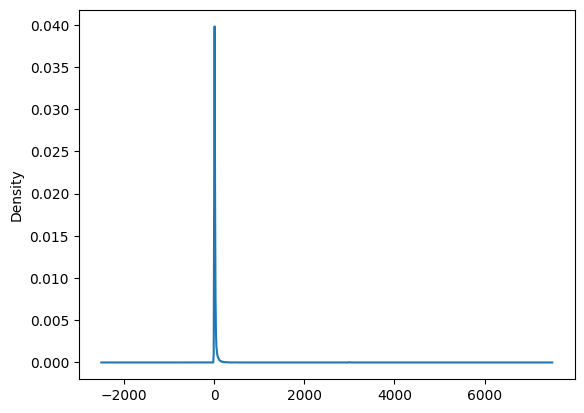

In [79]:
prices.itemprice.plot(kind="kde")

In [80]:
assert prices[prices.itemprice < 0].empty

In [81]:
prices[prices.itemprice == 0]['itemname'] # ok, there are "free" items.

121145        ענבים אוטום רויאל
130695        ענבים אוטום רויאל
149328                  אינטרנט
150853                שתייה קלה
154386                  אינטרנט
                   ...         
1384256                אוטו ספא
1384546       פירות וירקות הלחי
1384589                  VENDOR
1387055               Temp Item
1391540    מוכרנים - מוצרי חשמל
Name: itemname, Length: 9780, dtype: object

# unitqty

In [82]:
import math
def rename_unit(x):
    if isinstance(x,float):
        return x
    _x = x.strip().replace('"','').replace("'","").replace("`",'').replace(',',"")
    return replace_units(_x)

prices['unitqty_extracted_number'] = prices.unitqty.str.extract('(\d+)')
prices['unitqty'] = prices.unitqty.str.extract('(\D+)')

prices.unitqty = prices.unitqty.apply(rename_unit)
prices.unitqty_extracted_number = prices.unitqty_extracted_number.astype(float)

In [83]:
import numpy as np
values_unkown = prices[~prices.unitqty.isin(all_names)]['unitqty'].unique()

prices.loc[prices.unitqty.isin(values_unkown),'unitqty'] = np.nan

In [84]:
# unitofmeasure

In [85]:
prices['unitofmeasure_extracted_number'] = prices.unitofmeasure.str.extract('(\d+)')
prices['unitofmeasure'] = prices.unitofmeasure.str.extract('(\D+)')

prices.unitofmeasure = prices.unitofmeasure.apply(rename_unit)
prices.unitofmeasure_extracted_number = prices.unitofmeasure_extracted_number.astype(float)

In [86]:
values_unkown = prices[~prices.unitofmeasure.isin(all_names)]['unitofmeasure'].unique()

prices.loc[prices.unitofmeasure.isin(values_unkown),'unitofmeasure'] = np.nan

In [87]:
# bisweighted

In [88]:
assert (sorted(prices.bisweighted.unique()) == [0,1]) , 'assumed to be binary'

In [89]:
prices.bisweighted = prices.bisweighted.astype(bool)

In [90]:
columns_to_process = list(set(columns_to_process) - set(packing_details))
columns_to_process

['itemcode', 'itemtype', 'allowdiscount', 'itemid', 'bikoretno', 'itemstatus']

# Others

In [91]:
# itemstatus

In [92]:
assert (sorted(prices.itemstatus.unique()) == [0,1]) , 'assumed to be binary'

In [93]:
prices.itemstatus = prices.itemstatus.astype(bool)

In [94]:
# allowdiscount

In [95]:
assert (sorted(prices.allowdiscount.unique()) == [0,1]) , 'assumed to be binary'
prices.allowdiscount = prices.allowdiscount.astype(bool)

#  Seems not relevant 

In [96]:
# itemtype

In [97]:
prices.itemtype.value_counts()

1            1328325
not_apply      62340
0              58376
1              35964
3                  7
Name: itemtype, dtype: int64

In [98]:
# itemid
prices.itemid.value_counts()

not_apply    584809
10672            16
18614            15
18699            15
11022            15
              ...  
306637            1
306634            1
306633            1
306632            1
184732            1
Name: itemid, Length: 484406, dtype: int64

In [99]:
#bikoretno
prices.bikoretno.value_counts()

0      215651
4      189741
8      167707
2      158552
5      131375
1      128773
7      124317
3      120436
9      115770
6       70350
100     62340
Name: bikoretno, dtype: int64

In [100]:
#  itemcode will be processed in a seperate nb
prices = prices.drop(columns=['bikoretno','itemid','itemtype'])

In [101]:
prices.columns 

# new columns are 'processed_itemname','unitofmeasure_extracted_number','unitqty_extracted_number'
# removeed: 'bikoretno','itemid','itemtype','lastupdatedate','lastupdatetime'

Index(['file_id', 'chainid', 'subchainid', 'storeid', 'itemcode', 'itemname',
       'manufacturername', 'manufacturecountry', 'manufactureritemdescription',
       'unitqty', 'quantity', 'unitofmeasure', 'bisweighted', 'qtyinpackage',
       'itemprice', 'unitofmeasureprice', 'allowdiscount', 'itemstatus',
       'priceupdatedate', 'clean_itemname', 'processed_itemname',
       'unitqty_extracted_number', 'unitofmeasure_extracted_number'],
      dtype='object')

In [102]:
prices.to_csv("prices_full_processed.csv",index=False)

In [103]:
import pickle
with open('all_measure_names.pkl','wb') as pkl:
    pickle.dump(all_names,pkl)

In [104]:
!pip list

Package                Version
---------------------- -----------
anyio                  3.6.2
appnope                0.1.3
argon2-cffi            21.3.0
argon2-cffi-bindings   21.2.0
asttokens              2.0.8
attrs                  22.1.0
backcall               0.2.0
beautifulsoup4         4.10.0
black                  22.10.0
bleach                 5.0.1
certifi                2022.9.24
cffi                   1.15.1
chardet                3.0.4
charset-normalizer     2.0.12
click                  8.1.3
cloudpickle            2.2.0
contourpy              1.0.6
convertdate            2.4.0
cycler                 0.11.0
dask                   2022.11.1
debugpy                1.6.3
decorator              5.1.1
defusedxml             0.7.1
entrypoints            0.4
executing              1.1.1
fastjsonschema         2.16.2
filelock               3.8.0
fonttools              4.38.0
fsspec                 2022.11.0
googletrans            3.0.0
gplearn                0.4.2
graphviz      